# Customer Churn Sunbase Data

## Problem Statement
Develop a machine learning model to predict customer churn based on historical customer data. 

In [3]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

### 1. Data Preprocessing:

In [4]:
#Loading the dataset
df_churn=pd.read_excel("C:\data science\customer_churn_large_dataset.xlsx")
#pd.options.display.max_rows=None
df_churn.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0
5,6.0,Customer_6,67.0,Male,New York,15.0,82.65,456.0,1.0
6,7.0,Customer_7,30.0,Female,Chicago,3.0,73.79,269.0,0.0
7,8.0,Customer_8,67.0,Female,Miami,1.0,97.70,396.0,1.0
8,9.0,Customer_9,20.0,Female,Miami,10.0,42.45,150.0,1.0
9,10.0,Customer_10,53.0,Female,Los Angeles,12.0,64.49,383.0,1.0


####  *  Starting the EDA

In [5]:
# Checking Configuration of Dataset
df_churn.shape

(100000, 9)

Obs- We can see the dataset is a very huge with 100000 Rows and 9 Columns

In [6]:
# Checking the Columns
df_churn.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

Obs- The output column is 'Churn' which is affected by the other 8 input columns

In [7]:
# Checking data types of attributes
df_churn.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

Obs- We can see the dataset contains both continuous and categorical columns.

In [8]:
# Checking for null values if any
df_churn.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

Obs- We can see there is no null values present in the dataset

In [9]:
# Checking for white spaces
#pd.options.display.max_columns=None
#pd.options.display.max_rows=None
df_churn.loc[0:]==" "

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


Obs- There is no white space in the database (Viewed it by setting, display max rows, max columns)

In [10]:
#Check for duplicate data
df_churn.duplicated().sum()

0

Obs- There is no duplicate data present in the dataset

#### * Drop Irrelevant Column

Since CustomerID and Customer Name does not have any contribution in predicting the target, we will drop these columns

In [11]:
df_churn.drop('CustomerID',axis=1,inplace=True)

In [12]:
df_churn.shape

(100000, 8)

In [13]:
df_churn.drop('Name',axis=1,inplace=True)

In [14]:
df_churn.shape

(100000, 7)

Obs- We can see both the irrelevant columns are been dropped

In [15]:
# Checking the Unique Values in each column
df_churn.nunique()

Age                             53
Gender                           2
Location                         5
Subscription_Length_Months      24
Monthly_Bill                  7001
Total_Usage_GB                 451
Churn                            2
dtype: int64

#### * Seperating Numerical and Categorical Column

In [16]:
cat_cols = [x for x in df_churn.columns if df_churn[x].dtypes=='O']

num_cols = [y for y in df_churn.columns if df_churn[y].dtypes!='O']

#### * Visualization

Female    50216
Male      49784
Name: Gender, dtype: int64


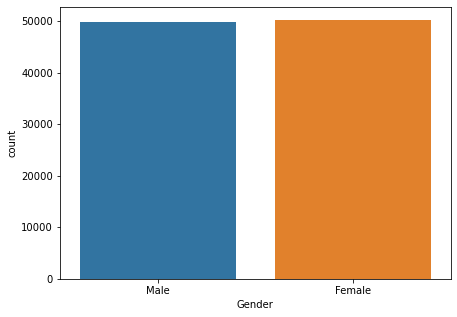

In [17]:
# Count plot to check individual value counts of 'gender'
print(df_churn['Gender'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['Gender'])
plt.show()

Obs- There is almost similar no. of both male and females who use telecom services

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64


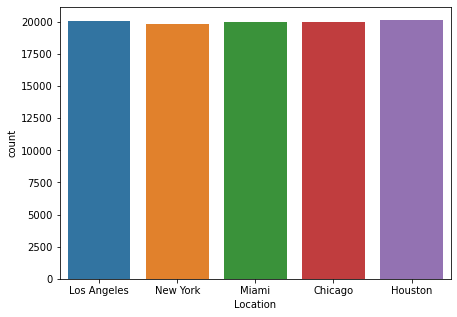

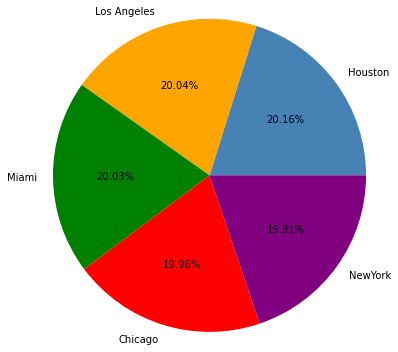

In [18]:
# Count plot to check individual value counts of 'Location'
print(df_churn['Location'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['Location'])
fig, ax = plt.subplots()
ax.pie(df_churn['Location'].value_counts(),labels = ['Houston','Los Angeles','Miami','Chicago','NewYork'], radius=1.8,autopct='%1.2f%%',colors=['steelblue','orange','green','red','purple'])
plt.show()

Obs- We can see almost similar count of customers from all the 5 locations

Obs- There is an almost equal proportion of people who have as well as don't have partners

0.0    50221
1.0    49779
Name: Churn, dtype: int64


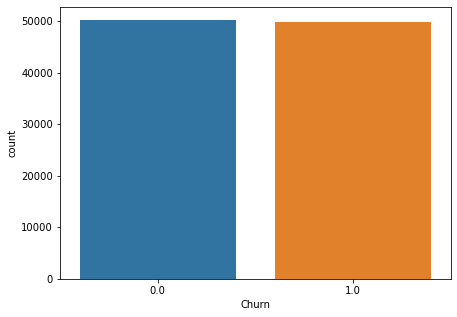

In [19]:
# Count plot to check individual value counts of 'churn'
print(df_churn['Churn'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_churn['Churn'])
plt.show()

Obs- We can see the data is quite balanced

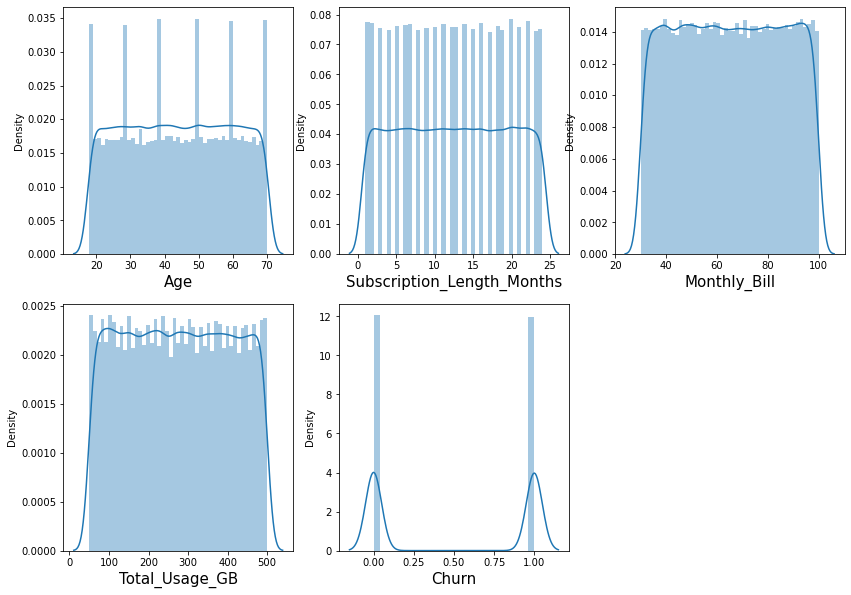

In [20]:
# Distribution plot to check skewness in the numerical features
plt.figure(figsize=(14,10))
plotnumber=1

for column in df_churn[num_cols]:
    if plotnumber<=5: #as there are 5 numerical columns 
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df_churn[column])
        plt.xlabel(column,fontsize=15)
    plotnumber +=1
plt.show()

Obs- We can observe a very little right skewness in columns 'Subscription_Length_Months','Total_Usage_GB'and 'Churn'

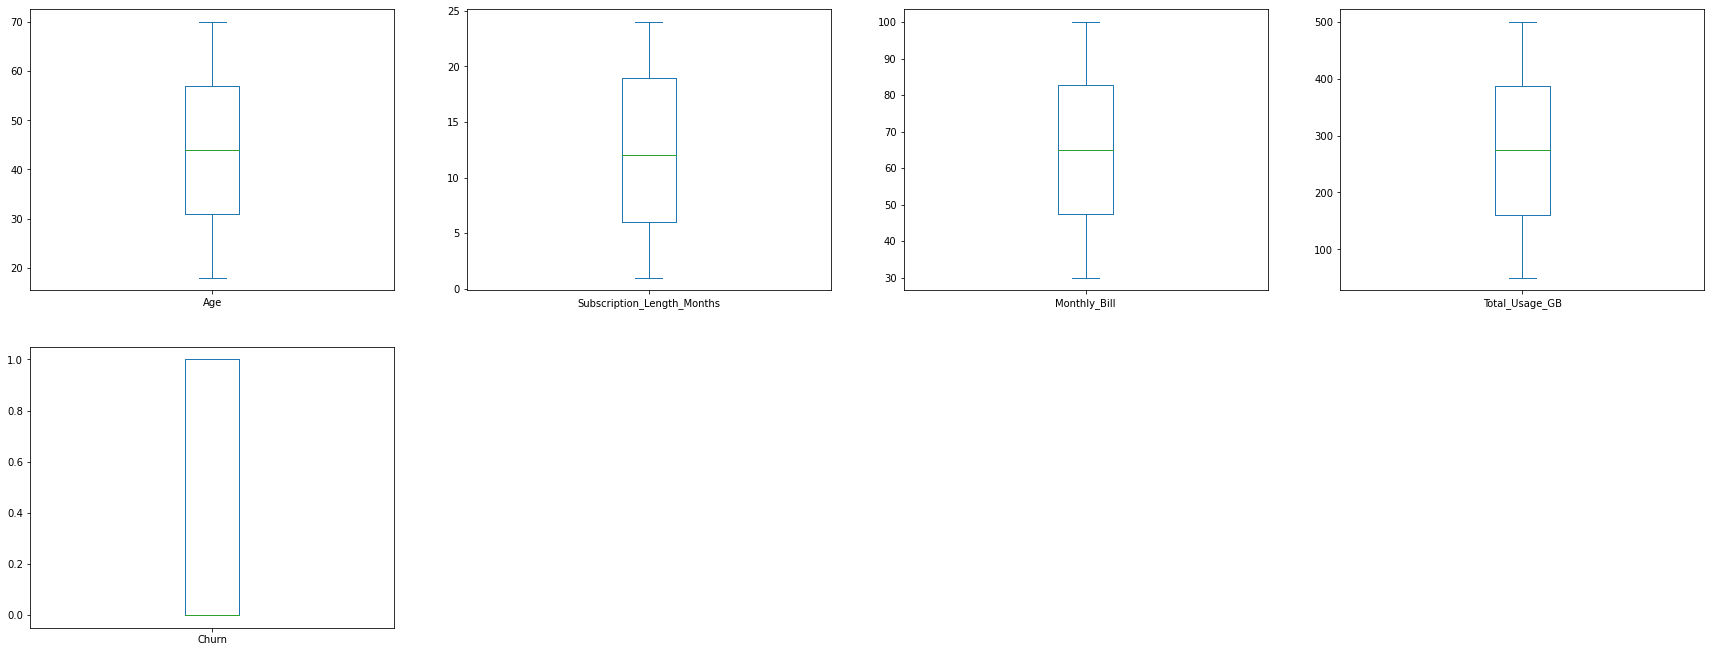

In [21]:
#box plot to check outliers
df_churn.plot(kind='box',subplots=True,layout=(5,4),figsize=(30,30))
plt.show()

Obs- We can see there are no outliers in any columns so no need to treat them.

#### * Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
for col in df_churn[cat_cols]:
    le = LabelEncoder()
    df_churn[col] = le.fit_transform(df_churn[col])

In [24]:
df_churn.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63.0,1,2,17.0,73.36,236.0,0.0
1,62.0,0,4,1.0,48.76,172.0,0.0
2,24.0,0,2,5.0,85.47,460.0,0.0
3,36.0,0,3,3.0,97.94,297.0,1.0
4,46.0,0,3,19.0,58.14,266.0,0.0


Obs- We can see all the categorical columns have been encoded

#### * Describing the dataset

In [25]:
df_churn.describe()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,0.497840,1.995840,12.490100,65.053197,274.393650,0.497790
std,15.280283,0.499998,1.411638,6.926461,20.230696,130.463063,0.499998
min,18.000000,0.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,0.000000,1.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,0.000000,2.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,1.000000,3.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,1.000000,4.000000,24.000000,100.000000,500.000000,1.000000


Obs- 
* We can see mean in columns 'Gender','Subscription_Length_Months','Total_Usage_GB','Churn' is greater than median and thus right skewness is present in these columns

* Also the max of all the columns is also not exceeding the 75% invariably, and thus we can predict there are no outliers in any of the columns

### 2. Feature Engineering

#### * Checking Correlation 

In [26]:
df_churn.corr()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559
Gender,0.000832,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121
Location,-0.005889,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405
Subscription_Length_Months,0.003382,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000


<AxesSubplot:>

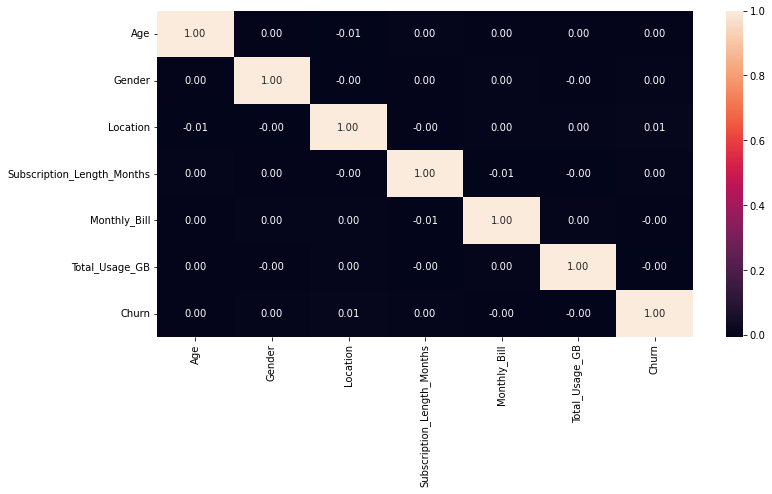

In [27]:
# Correlation using heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df_churn.corr(),annot=True,fmt='0.2f')

Obs- We can observe almost no correlation between any of the columns, and also with the target column too, and thus we will not be performing VIF to do feture engineering

#### * Detecting Outliers and Treating them

In [28]:
#Method 1: Z-Score
from scipy.stats import zscore
z=np.abs(zscore(df_churn))
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


Obs- We can see no outliers are found using Z-Score method

In [29]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_churn.quantile(0.25)
Q3=df_churn.quantile(0.75)
IQR=Q3 - Q1

df_churn_new2=df_churn[~((df_churn < (Q1 - 1.5 * IQR)) |(df_churn > (Q3 + 1.5 * IQR))).any(axis=1)]

In [30]:
print("df_churn.shape:",df_churn.shape, "\ndf_churn_new2.shape:",df_churn_new2.shape)

df_churn.shape: (100000, 7) 
df_churn_new2.shape: (100000, 7)


Obs- Through IQR too, we can see no outliers are present

#### * Data Transformation to treat Skewness

In [31]:
df_churn.skew()

Age                          -0.002689
Gender                        0.008640
Location                      0.004269
Subscription_Length_Months   -0.001655
Monthly_Bill                 -0.000326
Total_Usage_GB                0.007113
Churn                         0.008840
dtype: float64

Obs- We can see the skewness is within the permissible range and thus we will not be applying any transformation techniques.

### 3.  Model Building

#### Seperating Input and Target variables

In [32]:
x = df_churn.drop("Churn",axis=1)
y = df_churn["Churn"]

In [33]:
x.shape

(100000, 6)

In [34]:
y.shape

(100000,)

#### Checking for Imbalance in Target

In [35]:
print(y.value_counts())

0.0    50221
1.0    49779
Name: Churn, dtype: int64


Obs- We can see a very slight disbalance in the target data, balancing it through SMOTE

#### Oversampling using SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [37]:
print(y.value_counts())

0.0    50221
1.0    50221
Name: Churn, dtype: int64


#### * Classification Model 
(As the target is to compare several customer churn prediction, i.e whether the churn is Yes or No, we are building a clssification model)

In [38]:
# Finding best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    predlg = lg.predict(x_test)
    acc=accuracy_score(y_test, predlg)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.5058573656788239  on Random_state  53


#### * Splitting data into Train-Test

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=53)

#### * Using various Machine Learning Algorithms

In [40]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### 1. Logistic Regression

In [41]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.5058573656788239
Confusion Matrix:
 [[8996 6032]
 [8858 6247]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55     15028
         1.0       0.51      0.41      0.46     15105

    accuracy                           0.51     30133
   macro avg       0.51      0.51      0.50     30133
weighted avg       0.51      0.51      0.50     30133



Obs- The Logistic Regression has provided the accuracy_score=0.5058573656788239, precision=0.50, recall=0.60 and f1-score=0.55

#### 2. GaussianNB

In [42]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.5017754621179438
Confusion Matrix:
 [[9002 6026]
 [8987 6118]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55     15028
         1.0       0.50      0.41      0.45     15105

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



Obs- The GaussianNB has provided the accuracy_score= 0.5017754621179438, precision=0.50, recall=0.60 and f1-score=0.55

#### 3.Decision Tree Classifier

In [43]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.5021073241960641
Confusion Matrix:
 [[7617 7411]
 [7592 7513]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.51      0.50     15028
         1.0       0.50      0.50      0.50     15105

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



Obs- The Decision Tree Classifier has provided the accuracy_score=0.5021073241960641, precision=0.50, recall=0.51 and f1-score=0.50

#### 4.K Nearest Neighbor Classifier

In [44]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.5020741379882521
Confusion Matrix:
 [[7534 7494]
 [7510 7595]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     15028
         1.0       0.50      0.50      0.50     15105

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



Obs- The K Nearest Neighbor Classifier has provided the accuracy_score=0.5020741379882521, precision=0.50, recall=0.50 and f1-score=0.50

#### 5.Support Vector Machine Classifier

In [45]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.49895463445392096
Confusion Matrix:
 [[8892 6136]
 [8962 6143]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.59      0.54     15028
         1.0       0.50      0.41      0.45     15105

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.49     30133
weighted avg       0.50      0.50      0.49     30133



Obs- The Support Vector Machine Classifier has provided the accuracy_score=   0.49895463445392096, precision=0.50, recall=0.59 and f1-score=0.54

#### 6. Ensemble Methods
#### 6.1 Random Forest Classifier

In [46]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.5003152689742143
Confusion Matrix:
 [[7771 7257]
 [7800 7305]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.52      0.51     15028
         1.0       0.50      0.48      0.49     15105

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



Obs- The Random Forest Classifier has provided the accuracy_score=0.49872233099923674, precision=0.50, recall=0.52 and f1-score=0.51

#### 6.2 Ada Boost Classifier

In [47]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.5004812000132745
Confusion Matrix:
 [[8367 6661]
 [8391 6714]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.56      0.53     15028
         1.0       0.50      0.44      0.47     15105

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



Obs- The Ada Boost Classifier has provided the accuracy_score=0.49955198619453756, precision=0.50, recall=0.54 and f1-score=0.52

#### 6.3 Gradient Boosting Classifier

In [48]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.5011449241695152
Confusion Matrix:
 [[8370 6658]
 [8374 6731]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.56      0.53     15028
         1.0       0.50      0.45      0.47     15105

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



Obs- The Gradient Boosting Classifier has provided the accuracy_score= 0.5007135034679587, precision=0.50, recall=0.56 and f1-score=0.53

### 4. Model Optimization

#### * Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
# Using of K-Fold cross-validation technique

predlg= lg.predict(x_test)

from sklearn.model_selection import cross_val_score

test_accuracy= accuracy_score(y_test,predlg)

for j in range(5,11):
    cv_score=cross_val_score(lg,x,y,cv=j)
    cv_mean= cv_score.mean()
    print('At cv:',j)
    print('Cross_Validation_score is:',cv_mean*100)
    print('Accuracy is :',test_accuracy*100)
    print("\n")

At cv: 5
Cross_Validation_score is: 49.939266282565484
Accuracy is : 50.58573656788239


At cv: 6
Cross_Validation_score is: 49.96515017335705
Accuracy is : 50.58573656788239


At cv: 7
Cross_Validation_score is: 50.0099496503975
Accuracy is : 50.58573656788239


At cv: 8
Cross_Validation_score is: 49.864602122118555
Accuracy is : 50.58573656788239


At cv: 9
Cross_Validation_score is: 50.03782987504386
Accuracy is : 50.58573656788239


At cv: 10
Cross_Validation_score is: 50.0239042786156
Accuracy is : 50.58573656788239




Obs- Selecting the fold value as 10 as it is providing maximum cross-val-score

In [59]:
# cv score for Logistic Regression 
cvlg=cross_val_score(lg,x,y,cv=10).mean()
print('CV score  for Logistic Regression:',cvlg)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlg)-cvlg)

CV score  for Logistic Regression: 0.500239042786156
And Difference between CV and accuracy_score= 0.0056183228926678375


In [60]:
# cv score for GaussianNB 
cvgnb=cross_val_score(gnb,x,y,cv=10).mean()
print('CV score  for Gaussian NB:',cvgnb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgnb)-cvgnb)

CV score  for Gaussian NB: 0.5001095458727245
And Difference between CV and accuracy_score= 0.0016659162452192788


In [61]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=10).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.4991338835851968
And Difference between CV and accuracy_score= 0.002973440610867295


In [62]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=10).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.5040720808532055
And Difference between CV and accuracy_score= -0.0019979428649534725


In [63]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=10).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.5008760765721914
And Difference between CV and accuracy_score= -0.0005608075979770533


In [64]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=10).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.5019413554972357
And Difference between CV and accuracy_score= -0.0014601554839612785


In [65]:
# cv score for GradientBoostingClassifier
cvgb=cross_val_score(gb,x,y,cv=10).mean()
print('CV score  for Gradienty Boosting Classifier:',cvgb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgb)-cvgb)

CV score  for Gradienty Boosting Classifier: 0.5014336194016611
And Difference between CV and accuracy_score= -0.0002886952321459191


Obs- 
* We can observe the difference between CV score and r2_score is least in the model 'Gradient Boosting Classifier'
* Finding best parameters to pass in GB below using hyper parameter tuning

#### * Hyper Parameter Tuning

In [66]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [67]:
#Selecting few parameter list to pass in Decision Tree Classifier
from sklearn.model_selection import GridSearchCV
# defining parameter range:

parameter = {'loss':['log_loss', 'exponential'],
             'learning_rate':[0.0,0.1,1.0],
             'criterion':['friedman_mse', 'squared_error'],
             'n_estimators':[1,10,100]}

In [68]:
# Passing this parameters to GridSearchCV
GCV = GridSearchCV(gb,parameter,cv=10,scoring='accuracy')

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting accuracy with obtained best parameter 
accuracy_score(y_test, GCV_pred)                  #Printing accuracy

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}


0.5003816413898384

In [69]:
#Applying best parameter values on Gradient Boosting Classifier
churn_best1=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, criterion='friedman_mse', n_estimators=100)
churn_best1.fit(x_train,y_train)
preddtc1=churn_best1.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc1))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc1))
print("Classification Report:\n",classification_report(y_test,preddtc1))

Accuracy: 0.5003816413898384
Confusion Matrix:
 [[8349 6679]
 [8376 6729]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.50      0.56      0.53     15028
         1.0       0.50      0.45      0.47     15105

    accuracy                           0.50     30133
   macro avg       0.50      0.50      0.50     30133
weighted avg       0.50      0.50      0.50     30133



Our best model with best parameters has given accuracy of  0.5003816413898384, precision of 0.50, recall of 0.56 and f1_score of 0.53

#### * Plotting ROC-AUC curve for best model

In [70]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

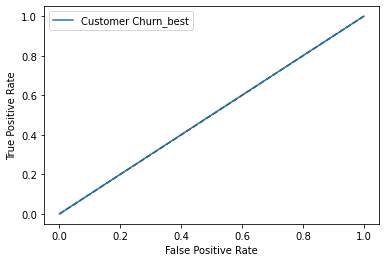

In [71]:
fpr,tpr,threshholds=roc_curve(y_test,preddtc1)
auc = roc_auc_score(y_test,preddtc1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Customer Churn_best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Obs- The best model ie. Decision Tree Classifier has AUC(area under curve)=  0.50%

### 5. Model Deployment:

#### * Saving/Deploying the best model

In [72]:
import joblib

joblib.dump(churn_best1,'Churn.obj')

['Churn.obj']

In [73]:
churn_models=joblib.load('Churn.obj')

In [74]:
churn_models

GradientBoostingClassifier(loss='exponential')

#### * Predicting the Output i.e.churn predictions.

In [75]:
ori = np.array(y_test)
predicted = np.array(churn_models.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
30128,1.0,0.0
30129,1.0,0.0
30130,1.0,1.0
30131,0.0,0.0


Obs- We can see our best model has given not very accurate but fair results

## Concluding Remarks

* We have predicted the Churn of a Telecom Industry by collecting the dataset of numerous customers who have different subscription lengths and different data consumption capacity from different regions. 
* We classified the output using classification model. The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that Gradient Boosting Classifier model achieved higher prediction accuracy.